In [1]:
import os
import cv2
import random
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm

In [2]:
training_file = "train2.p"
test_file = "test.p"

In [3]:
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
# with open(test_file, mode='rb') as f:
#     test = pickle.load(f)

In [5]:
print([t for t in train])

KeyboardInterrupt: 

In [4]:
train

KeyboardInterrupt: 

In [25]:
X_train = train['data']

In [26]:
X_train.shape

(9807, 12288)

In [27]:
y_train.shape

NameError: name 'y_train' is not defined

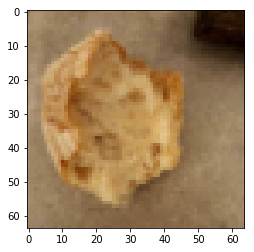

In [35]:
original_image = X_train[4]
plt.imshow(original_image)

IndexError: index 4416 is out of bounds for axis 0 with size 484

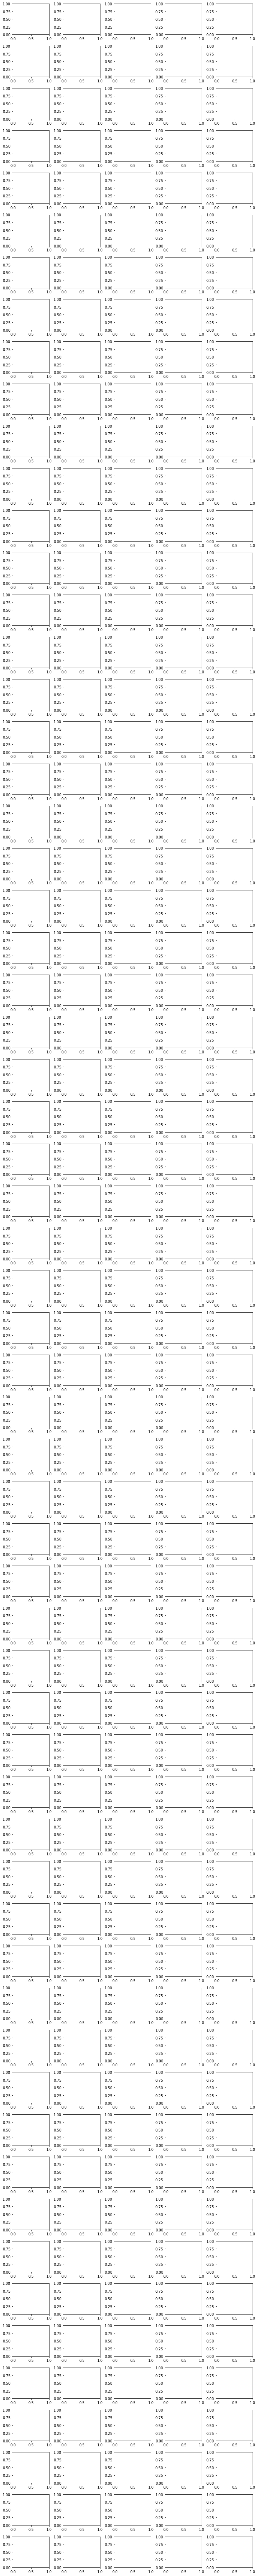

In [11]:
data = pd.read_csv("../data/dataset_info.txt")
# print(data)
num_of_samples = []
cols = 5
num_classes = 61


fig, axs = plt.subplots(nrows = num_classes, ncols = cols, figsize = (10, 100))
fig.tight_layout()
for i in range(cols):
    for j, row in data.iterrows():
        x_selected = X_train[y_train == j]
#         print(y_train.shape)
        axs[j][i].imshow(x_selected[random.randint(0, len(X_train) - 1)], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + "-" + row["List_of_Classes"])
            num_of_samples.append(len(x_selected))
    

In [ ]:
dataTrain = pd.read_csv("../data/train.csv")
dataTest = pd.read_csv("../data/test.csv")

In [ ]:
print(dataTrain.shape)
print(dataTest.shape)

In [ ]:
X_train, y_train = dataTrain['ImageId'], dataTrain['ClassName']

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
dataTrain.groupby(['ClassName']).size()

In [ ]:
pd.read_csv("../data/dataset_info.txt")

In [ ]:
img = mpimg.imread("../data/train_images/0a9333423c.jpg")
img.shape

In [ ]:
plt.imshow(img)

In [ ]:
X_train[X_train['ClassName'] == 'water']

In [ ]:
data = pd.read_csv("../data/dataset_info.txt")
# print(data)
num_of_samples = []
cols = 5
num_classes = 62


fig, axs = plt.subplots(nrows = num_classes, ncols = cols, figsize = (20, 200))
fig.tight_layout()
for i in range(cols):
    for j, row in data.iterrows():
#         print('j', j)
#         print('row', row)
        
        x_selected = X_train[j]
#         print(x_selected)
        x_selected = mpimg.imread("../data/train_images/"+x_selected)
#         plt.imshow(x_selected)
#         print(y_train.shape)
        axs[j][i].imshow(x_selected, cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + " -" + row['List of Classes'])
            num_of_samples.append(len(x_selected))

In [ ]:
print(num_of_samples)
print(sum(num_of_samples))
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [ ]:
def generate(images, count):
    generated = []
#     print(images)
    while True:
        for image in images:
            if len(generated) == count:
                return generated
            image = image#random_augment(image)
            generated.append(np.expand_dims(image, axis=2))

In [ ]:
print(max(num_of_samples))

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)

target = max(num_of_samples)
x_augmented = []
y_augmented = []

for cls, count in tqdm(list(zip(unique, counts)), 'Augmenting training dataset'):
    diff = target - count
#     print(diff, target, count)
    x_augmented += generate(X_train[np.where(y_train == cls)[0]], diff)
    y_augmented += [cls for _ in range(diff)]


    
print(X_train.shape)
print(np.array(x_augmented).shape)
X_train = X_train.reshape(34799, 32, 32, 1)
X_valid = X_valid.reshape(4410, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)
x_train = np.concatenate([X_train, np.array(x_augmented)])
y_train = np.concatenate([y_train, np.array(y_augmented)])
n_train = y_train.size
print('Final number of training samples', n_train)

In [ ]:
data = pd.read_csv("../data/dataset_info.txt")
# print(data)
num_of_samples = []
cols = 5
num_classes = 62


fig, axs = plt.subplots(nrows = num_classes, ncols = cols, figsize = (10, 100))
fig.tight_layout()
for i in range(cols):
    for j, row in data.iterrows():
#         print('j', j)
#         print('row', row['List of Classes'])
#         print(row['List of Classes'])
        x_selected = dataTrain[dataTrain['ClassName'] == row['List of Classes']]
        print(x_selected)
#         print(x_selected.shape)
#         x_selected = mpimg.imread("../data/train_images/"+x_selected)
# #         plt.imshow(x_selected)
# #         print(y_train.shape)
#         axs[j][i].imshow(x_selected[random.randint(0, len(X_train) - 1), :, :], cmap=plt.get_cmap("gray"))
#         axs[j][i].axis("off")
#         if i == 1:
#             axs[j][i].set_title(str(j+1) + " -" + row['List of Classes'])
#             num_of_samples.append(len(x_selected))